In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 148s 85ms/step - accuracy: 0.9003 - loss: 0.3333 - val_accuracy: 0.9862 - val_loss: 0.0465
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 137s 81ms/step - accuracy: 0.9848 - loss: 0.0492 - val_accuracy: 0.9872 - val_loss: 0.0481
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 142s 84ms/step - accuracy: 0.9895 - loss: 0.0325 - val_accuracy: 0.9900 - val_loss: 0.0350
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 141s 84ms/step - accuracy: 0.9923 - loss: 0.0235 - val_accuracy: 0.9868 - val_loss: 0.0402
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 137s 81ms/step - accuracy: 0.9941 - loss: 0.0185 - val_accuracy: 0.9888 - val_loss: 0.0385


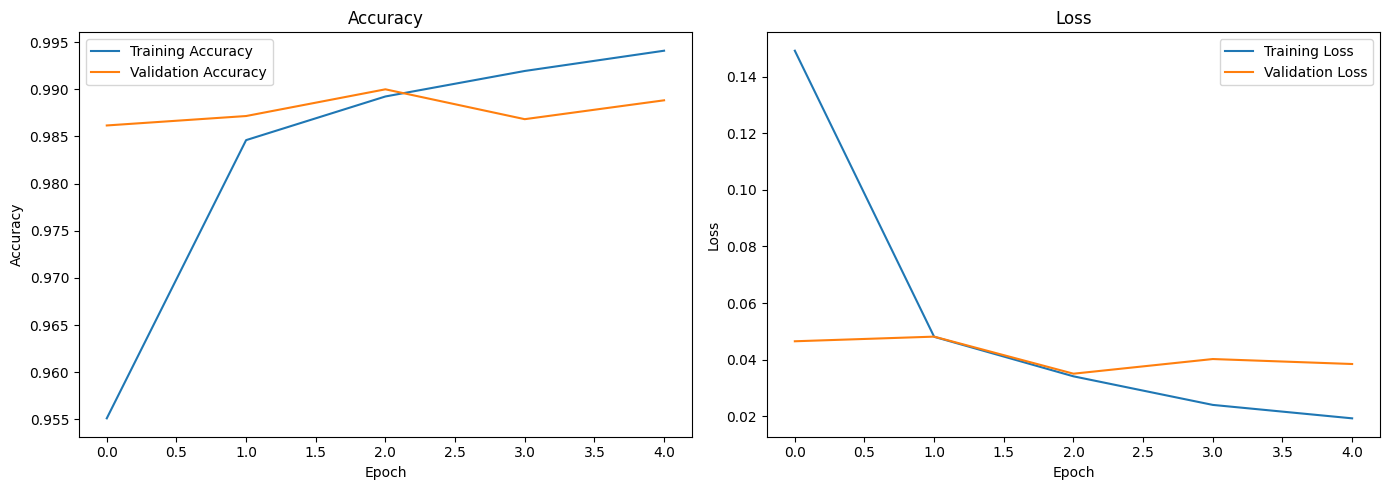

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9856 - loss: 0.0460
Test accuracy: 0.9882
Test loss: 0.0386
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step


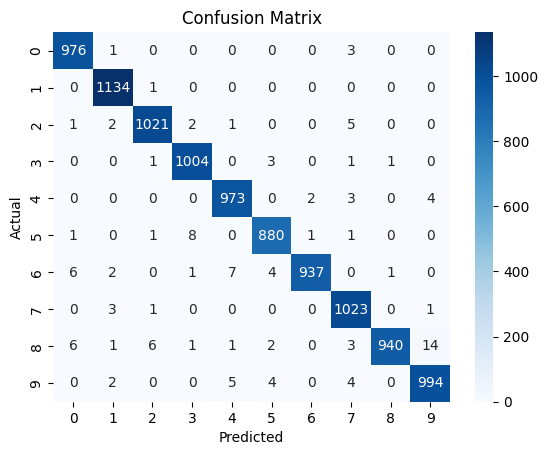

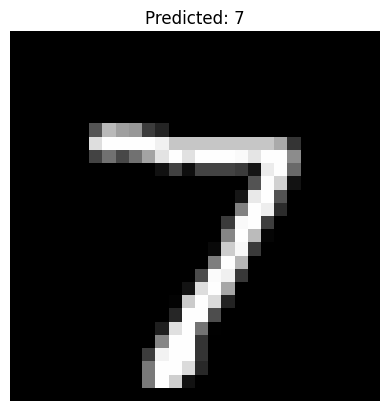

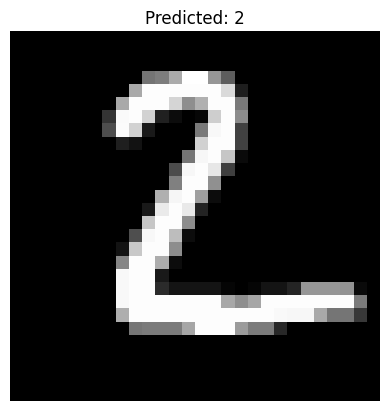

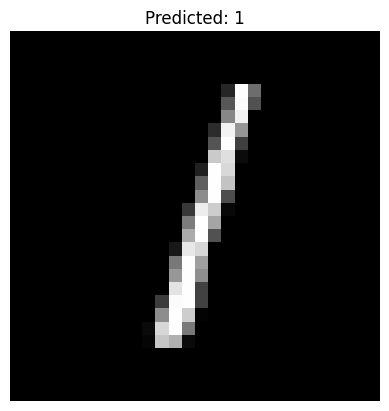

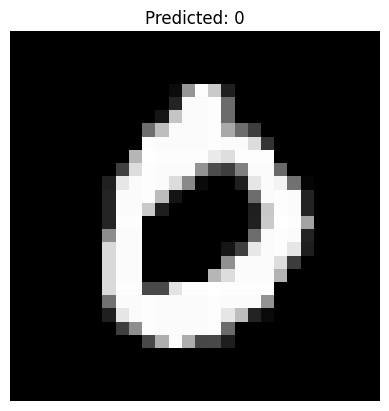

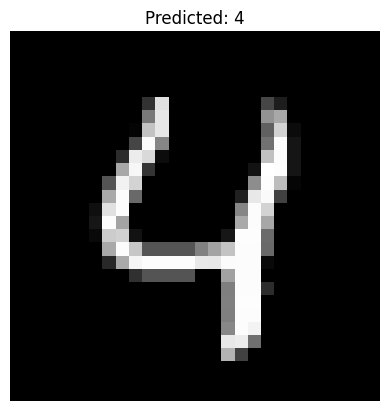

In [22]:
#dataset loading
train_df= pd.read_csv('mnist_train.csv')
test_df= pd.read_csv('mnist_test.csv')

#prepare data
X_train=train_df.iloc[:,1:].values.reshape(-1,28,28,1)/255.0
y_train=to_categorical(train_df.iloc[:,0].values)

X_test=test_df.iloc[:,1:].values.reshape(-1,28,28,1)/255.0
y_test=to_categorical(test_df.iloc[:,0].values)

#CNN model
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

#training
hist= model.fit(X_train,y_train,epochs=5,batch_size=32,validation_split=0.1)

plt.figure(figsize=(14,5))

#accuracy
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#loss
plt.subplot(1,2,2)
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#evaluate
loss, acc =model.evaluate(X_test,y_test)
print(f"Test accuracy: {acc:.4f}")
print(f"Test loss: {loss:.4f}")

#classification report
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_test_classes=np.argmax(y_test,axis=1)

print("classification report:")
print(classification_report(y_test_classes,y_pred_classes))

#confusion matrix
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_test_classes=np.argmax(y_test,axis=1)
cm=confusion_matrix(y_test_classes,y_pred_classes)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#predict few digits
for i in range(5):
  plt.imshow(X_test[i].reshape(28,28),cmap='gray')
  plt.title("Predicted: {}".format(np.argmax(y_pred[i])))
  plt.axis('off')
  plt.show()
